In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
sources = """
sources for the data:
start till 2025-06-18 1:26: https://x.com/LittleMoiz/status/1935266133013098628
2025-06-18 20:00,1: https://www.ynet.co.il/news/article/rk5q6dgnge
2025-06-19 00:01:4: https://www.haaretz.co.il/news/dailynews/2025-06-19/ty-article-live/00000197-8502-d01a-a3f7-97dfeea70000?liveBlogItemId=485478857#485478857
2025-06-19 07:30: https://www.ynet.co.il/news/article/h1lvjslege#SJgV4tmWNgg
2025-06-19 17:00: https://www.haaretz.co.il/news/politics/war-2023/2025-06-19/ty-article-live/00000197-84e5-de6d-a3b7-f5ef8cd10000?liveBlogItemId=2091202563#2091202563
"""

In [3]:
def exponential_model(t, a, b, c):
    return a *(1 - np.exp(b * (t+c)))

df = pd.read_csv('missiles.csv', index_col=0, parse_dates=True)

df['float_time'] = (df.index - df.index[0]).total_seconds() / (60 * 60 * 24)  # time in days
df.set_index('float_time', inplace=True)

df = df.cumsum()

# Prepare data
t = df.index.values  # time in days
y = df['Value'].values

In [4]:
# Fit curve
params, _ = curve_fit(exponential_model, t, y, p0=(500, -0.5, 0))  # initial guess
a_fit, b_fit, c_fit = params

df['Fitted'] = exponential_model(t, a_fit, b_fit, c_fit)
# Actual and predicted values
y_actual = df['Value'].values
y_pred = df['Fitted'].values


# R^2 calculation
ss_res = np.sum((y_actual - y_pred) ** 2)
ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

df['Residual'] = y_actual - y_pred


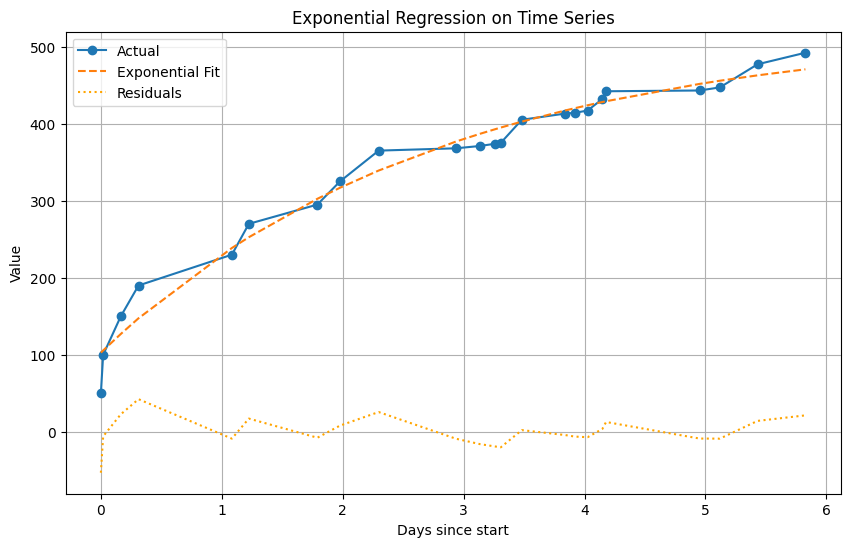

R² = 0.9740
Fitted function: y = 521.13 * (1 - exp(-0.3623 * (t + 0.61)))


In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Actual', marker='o')
plt.plot(df.index, df['Fitted'], label='Exponential Fit', linestyle='--')
plt.plot(df.index, df['Residual'], label='Residuals', linestyle=':', color='orange')
plt.title('Exponential Regression on Time Series')
plt.xlabel('Days since start')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
print(f"R² = {r_squared:.4f}")
print(f"Fitted function: y = {a_fit:.2f} * (1 - exp({b_fit:.4f} * (t + {c_fit:.2f})))")

